## EDA

### Let's Import the necessary Libraries 

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('e-finance dataset.csv')
df.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",57189258279;8933999000;22834655700;55841871100...,Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,NaN,50,57.0,...,9781450370417,NaN,NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Open Access,Scopus,2-s2.0-85078939286
1,"Xiong H., Zhou Y.",57212174318;57212168803;,Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,NaN,29,34.0,...,NaN,JCRSE,NaN,English,J. Coast. Res.,Article,Final,NaN,Scopus,2-s2.0-85076117139
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",57194783804;56979549200;57050382000;57197771738;,System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,NaN,1151,1165.0,...,NaN,NaN,NaN,English,Front. Comput. Sci.,Article,Final,NaN,Scopus,2-s2.0-85051801026
3,"Rožkalne Z., Mukāns M., Vētra A.",57211844555;56074676500;6506045608;,Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,737,NaN,NaN,...,NaN,NaN,31739609.0,English,Medicina,Article,Final,Open Access,Scopus,2-s2.0-85075115419
4,"Alshubiri F., Jamil S.A., Elheddad M.",56539905200;56770916900;57195032630;,The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Intern. J. Eng. Bus. Manage.,Article,Final,Open Access,Scopus,2-s2.0-85071721834


In [3]:
df.shape

(228, 46)

In [4]:
df.describe()

,Year,Page end,Page count,Cited by,Molecular Sequence Numbers,Chemicals/CAS,Tradenames,Manufacturers,Conference code,PubMed ID
count,228.000000,199.000000,4.000000,153.000000,0.0,0.0,0.0,0.0,62.000000,4.000000e+00
mean,2010.214912,723.462312,69.750000,9.294118,NaN,NaN,NaN,NaN,99295.548387,2.013451e+07
std,6.172437,5156.031031,115.508658,14.032801,NaN,NaN,NaN,NaN,33891.037731,9.310620e+06
min,1981.000000,3.000000,10.000000,1.000000,NaN,NaN,NaN,NaN,6372.000000,1.030222e+07
25%,2007.000000,100.500000,12.250000,2.000000,NaN,NaN,NaN,NaN,84516.750000,1.424886e+07
50%,2011.000000,206.000000,13.000000,4.000000,NaN,NaN,NaN,NaN,92701.500000,1.924810e+07
75%,2014.000000,416.000000,70.500000,10.000000,NaN,NaN,NaN,NaN,109673.250000,2.513375e+07
max,2019.000000,72560.000000,243.000000,86.000000,NaN,NaN,NaN,NaN,227949.000000,3.173961e+07


#### From the count row, we can see that the toal number of observation is 228, and the year range is from 1981 to 2019.

In [44]:
#The Percentage of missing values in the dataset

(df.isna().sum() / df.shape[0]) * 100

Authors                           0.000000
Author(s) ID                      0.000000
Title                             0.000000
Year                              0.000000
Source title                      0.438596
Volume                           21.052632
Issue                            35.526316
Page start                        9.649123
Page end                         12.719298
Cited by                         32.894737
DOI                              23.684211
Link                              0.000000
Affiliations                      6.140351
Authors with affiliations         0.877193
Abstract                          0.000000
Author Keywords                  21.052632
References                        7.017544
Correspondence Address           16.228070
Publisher                        38.596491
ISSN                             23.684211
Language of Original Document     0.000000
Abbreviated Source Title          4.385965
Document Type                     0.000000
Publication

#### We will have to drop the columns with null values above 60%.  

In [6]:
df= df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [7]:
df.shape

(228, 26)

In [8]:
#Check the dataset again
df.isna().sum()

Authors                           0
Author(s) ID                      0
Title                             0
Year                              0
Source title                      1
Volume                           48
Issue                            81
Page start                       22
Page end                         29
Cited by                         75
DOI                              54
Link                              0
Affiliations                     14
Authors with affiliations         2
Abstract                          0
Author Keywords                  48
References                       16
Correspondence Address           37
Publisher                        88
ISSN                             54
Language of Original Document     0
Abbreviated Source Title         10
Document Type                     0
Publication Stage                 0
Source                            0
EID                               0
dtype: int64

#### From the above count values, we have dropped Columns with empty entries above 60%, which leaves us with 26 columns.

In [9]:
language_count=df['Language of Original Document'].value_counts()
language_count

English    223
Chinese      2
German       2
Polish       1
Name: Language of Original Document, dtype: int64

#### From the above array, we can see that the publications are from four languages. English, Polish, Chinese, German. The most is English.

In [51]:
year_count=df['Year'].value_counts()
year_count

2011    35
2012    19
2010    19
2019    15
2006    15
2013    13
2007    13
2017    11
2015    11
2005    10
2018     9
2008     9
2014     9
2002     8
2016     7
2004     7
2001     5
2009     4
2003     4
1981     2
1988     1
1986     1
1984     1
Name: Year, dtype: int64

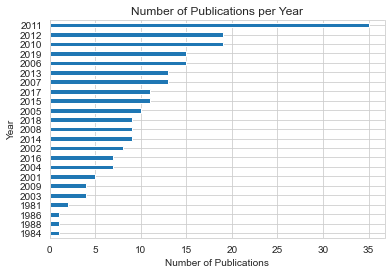

In [57]:
sns.set_style('whitegrid')
year_count = year_count.sort_values()
year_count.plot.barh()
plt.title('Number of Publications per Year')
plt.ylabel('Year')
plt.xlabel('Number of Publications')
plt.show()

#### From the above plot, we can see that 2011 was the year with the most publications in the dataset.

In [12]:
publication_count = df['Document Type'].value_counts(normalize=True)
publication_count

Article              0.609649
Conference Paper     0.280702
Book Chapter         0.048246
Review               0.039474
Editorial            0.008772
Book                 0.008772
Conference Review    0.004386
Name: Document Type, dtype: float64

#### Most of the publications are Articles. Articles represent over 60% of the dataset.

In [13]:
df['Author(s) ID'] = df['Author(s) ID'].str.rstrip(';')

In [14]:
df = df.assign(Authors=df['Authors'].str.split(','))
df = df.assign(**{'Author(s) ID': df['Author(s) ID'].str.split(';')})
df.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Page start,Page end,Cited by,...,References,Correspondence Address,Publisher,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID
0,"[Beni E.H., Lagaisse B., Joosen W., Aly A.,...","[57189258279, 8933999000, 22834655700, 5584187...",Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,50,57.0,NaN,...,"Agrawal, R., Kiernan, J., Srikant, R., Xu, Y.,...",NaN,"Association for Computing Machinery, Inc",NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Scopus,2-s2.0-85078939286
1,"[Xiong H., Zhou Y.]","[57212174318, 57212168803]",Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,29,34.0,NaN,...,"Boczon, A., Dudzinska, M., Kowalska, A., Effec...","Xiong, H.; School of Management, Nanchang Univ...",Coastal Education Research Foundation Inc.,07490208,English,J. Coast. Res.,Article,Final,Scopus,2-s2.0-85076117139
2,"[Feng L., Zhang H., Tsai W.-T., Sun S.]","[57194783804, 56979549200, 57050382000, 571977...",System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,1151,1165.0,2.0,...,"Garay, J., Kiayias, A., Leonardos, N., The bit...","Zhang, H.; State Key Laboratory of Software De...",Higher Education Press,20952228,English,Front. Comput. Sci.,Article,Final,Scopus,2-s2.0-85051801026
3,"[Rožkalne Z., Mukāns M., Vētra A.]","[57211844555, 56074676500, 6506045608]",Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,NaN,NaN,NaN,...,"Mutch, L., Alberman, E., Hagberg, B., Kodama, ...","Rožkalne, Z.; Rehabilitation Clinic, Children’...",MDPI AG,1010660X,English,Medicina,Article,Final,Scopus,2-s2.0-85075115419
4,"[Alshubiri F., Jamil S.A., Elheddad M.]","[56539905200, 56770916900, 57195032630]",The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,"Sassi, S., Goaied, M., Financial development, ...","Alshubiri, F.; Department of Finance and Econo...",SAGE Publications Inc.,18479790,English,Intern. J. Eng. Bus. Manage.,Article,Final,Scopus,2-s2.0-85071721834


In [15]:
df_authors = df[['Authors', 'Title', 'Year']]
df_authors.head()

,Authors,Title,Year
0,"[Beni E.H., Lagaisse B., Joosen W., Aly A.,...",Datablinder: A distributed data protection mid...,2019
1,"[Xiong H., Zhou Y.]",Construction and Application of Ocean Shipping...,2019
2,"[Feng L., Zhang H., Tsai W.-T., Sun S.]",System architecture for high-performance permi...,2019
3,"[Rožkalne Z., Mukāns M., Vētra A.]",Transition-age young adults with cerebral pals...,2019
4,"[Alshubiri F., Jamil S.A., Elheddad M.]",The impact of ICT on financial development: Em...,2019


In [16]:
df_authors = df_authors.explode('Authors').reset_index(drop=True)
df_authors.drop(132, inplace=True)
df_authors.reset_index(drop=True, inplace=True)
df_authors.head(10)

,Authors,Title,Year
0,Beni E.H.,Datablinder: A distributed data protection mid...,2019
1,Lagaisse B.,Datablinder: A distributed data protection mid...,2019
2,Joosen W.,Datablinder: A distributed data protection mid...,2019
3,Aly A.,Datablinder: A distributed data protection mid...,2019
4,Brackx M.,Datablinder: A distributed data protection mid...,2019
5,Xiong H.,Construction and Application of Ocean Shipping...,2019
6,Zhou Y.,Construction and Application of Ocean Shipping...,2019
7,Feng L.,System architecture for high-performance permi...,2019
8,Zhang H.,System architecture for high-performance permi...,2019
9,Tsai W.-T.,System architecture for high-performance permi...,2019


#### The row with modified-index 132 was dropped because the name was mistakingly added to the dataset and didn't belong to anybody.
#### Also, a quick Google search revealed that no such author 'Jr.' was among the writers of the journal 'The Phenomenological Experience of First Responder Spouses', published in January 2016.

In [17]:
df_author_ids = df[['Author(s) ID', 'Title', 'Year']]
df_author_ids.head()

,Author(s) ID,Title,Year
0,"[57189258279, 8933999000, 22834655700, 5584187...",Datablinder: A distributed data protection mid...,2019
1,"[57212174318, 57212168803]",Construction and Application of Ocean Shipping...,2019
2,"[57194783804, 56979549200, 57050382000, 571977...",System architecture for high-performance permi...,2019
3,"[57211844555, 56074676500, 6506045608]",Transition-age young adults with cerebral pals...,2019
4,"[56539905200, 56770916900, 57195032630]",The impact of ICT on financial development: Em...,2019


In [18]:
df_author_ids = df_author_ids.explode('Author(s) ID').reset_index(drop=True)
df_author_ids.head(10)

,Author(s) ID,Title,Year
0,57189258279,Datablinder: A distributed data protection mid...,2019
1,8933999000,Datablinder: A distributed data protection mid...,2019
2,22834655700,Datablinder: A distributed data protection mid...,2019
3,55841871100,Datablinder: A distributed data protection mid...,2019
4,55387606200,Datablinder: A distributed data protection mid...,2019
5,57212174318,Construction and Application of Ocean Shipping...,2019
6,57212168803,Construction and Application of Ocean Shipping...,2019
7,57194783804,System architecture for high-performance permi...,2019
8,56979549200,System architecture for high-performance permi...,2019
9,57050382000,System architecture for high-performance permi...,2019


In [19]:
authors_and_id = pd.concat([df_authors.Authors, df_author_ids], axis=1)
authors_and_id.head(10)

,Authors,Author(s) ID,Title,Year
0,Beni E.H.,57189258279,Datablinder: A distributed data protection mid...,2019
1,Lagaisse B.,8933999000,Datablinder: A distributed data protection mid...,2019
2,Joosen W.,22834655700,Datablinder: A distributed data protection mid...,2019
3,Aly A.,55841871100,Datablinder: A distributed data protection mid...,2019
4,Brackx M.,55387606200,Datablinder: A distributed data protection mid...,2019
5,Xiong H.,57212174318,Construction and Application of Ocean Shipping...,2019
6,Zhou Y.,57212168803,Construction and Application of Ocean Shipping...,2019
7,Feng L.,57194783804,System architecture for high-performance permi...,2019
8,Zhang H.,56979549200,System architecture for high-performance permi...,2019
9,Tsai W.-T.,57050382000,System architecture for high-performance permi...,2019


In [20]:
author_count = authors_and_id.Authors.value_counts()
author_count

Martin P.L.        6
Hu J.              5
 Zhong N.          5
Sakkthivel A.M.    4
Greiner M.E.       3
                  ..
 Yuan H.           1
Su C.              1
 Xu Y.             1
 Hu X.             1
Holland J.B.       1
Name: Authors, Length: 510, dtype: int64

#### We see that there are 510 authors in total.

#### We also see that the author with the most publications is Martin P.L with 6 publications, closely followed by Hu J. and Zhong N.; each with 5 apiece.

In [21]:
no_of_authors = [len(ids)for ids in df['Author(s) ID'].values]
df['Number of Authors'] = no_of_authors
df.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Page start,Page end,Cited by,...,Correspondence Address,Publisher,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID,Number of Authors
0,"[Beni E.H., Lagaisse B., Joosen W., Aly A.,...","[57189258279, 8933999000, 22834655700, 5584187...",Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,50,57.0,NaN,...,NaN,"Association for Computing Machinery, Inc",NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Scopus,2-s2.0-85078939286,5
1,"[Xiong H., Zhou Y.]","[57212174318, 57212168803]",Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,29,34.0,NaN,...,"Xiong, H.; School of Management, Nanchang Univ...",Coastal Education Research Foundation Inc.,07490208,English,J. Coast. Res.,Article,Final,Scopus,2-s2.0-85076117139,2
2,"[Feng L., Zhang H., Tsai W.-T., Sun S.]","[57194783804, 56979549200, 57050382000, 571977...",System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,1151,1165.0,2.0,...,"Zhang, H.; State Key Laboratory of Software De...",Higher Education Press,20952228,English,Front. Comput. Sci.,Article,Final,Scopus,2-s2.0-85051801026,4
3,"[Rožkalne Z., Mukāns M., Vētra A.]","[57211844555, 56074676500, 6506045608]",Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,NaN,NaN,NaN,...,"Rožkalne, Z.; Rehabilitation Clinic, Children’...",MDPI AG,1010660X,English,Medicina,Article,Final,Scopus,2-s2.0-85075115419,3
4,"[Alshubiri F., Jamil S.A., Elheddad M.]","[56539905200, 56770916900, 57195032630]",The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,"Alshubiri, F.; Department of Finance and Econo...",SAGE Publications Inc.,18479790,English,Intern. J. Eng. Bus. Manage.,Article,Final,Scopus,2-s2.0-85071721834,3


In [22]:
df.sort_values('Number of Authors', ascending=False).head(3)

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Page start,Page end,Cited by,...,Correspondence Address,Publisher,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID,Number of Authors
205,"[Ondategui-Parra S., Bhagwat J.G., Zou K.H.,...","[8237524700, 8951098600, 7006828339, 700673145...",Practice management performance indicators in ...,2004,Radiology,233,3,716,722.0,40.0,...,"Ondategui-Parra, S.email: sondateguiparra@part...",NaN,00338419,English,Radiology,Article,Final,Scopus,2-s2.0-16544368575,8
203,"[Godart C., Molli P., Oster G., Perrin O., ...","[7005233014, 6603158402, 8412487000, 660384413...",The ToxicFarm integrated cooperation framework...,2004,Distributed and Parallel Databases,15,1,67,88.0,14.0,...,"Godart, C.; LORIA, INRIA, Lorraine, France; em...",NaN,09268782,English,Distrib Parallel Databases,Article,Final,Scopus,2-s2.0-0842348211,7
31,"[Huang Y., Fu C., Chen X., Guo H., He X., ...","[57193141268, 56652938100, 57202191954, 571946...",A mutation approach of detecting SQL injection...,2017,Lecture Notes in Computer Science (including s...,10603 LNCS,NaN,175,188.0,2.0,...,"Liu, Z.; Nankai UniversityChina; email: liuzhe...",Springer Verlag,03029743,English,Lect. Notes Comput. Sci.,Conference Paper,Final,Scopus,2-s2.0-85034244235,7


#### The publication with the most authors is 'Practice management performance indicators in academic radiology departments.' with 8 authors.

In [60]:
df['Source title'].value_counts()

International Journal of Electronic Finance                                                                                             54
Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)    12
T and D                                                                                                                                  6
Formal Aspects of Computing                                                                                                              3
Wirtschaftsinformatik                                                                                                                    2
                                                                                                                                        ..
International Journal of Business Excellence                                                                                             1
Handbook of Digital Currenc

#### There are 146 source titles and the International Journal of Electronic Finance had the most (54) documents published in the dataset.

In [141]:
df.groupby(['Year', 'Source title']).count()['Title'].sort_values(ascending=False).head(8)

Year  Source title                               
2011  International Journal of Electronic Finance    19
2012  International Journal of Electronic Finance    11
2013  International Journal of Electronic Finance     7
2010  International Journal of Electronic Finance     5
2002  T and D                                         4
2015  International Journal of Electronic Finance     4
2006  International Journal of Electronic Finance     4
2008  Formal Aspects of Computing                     3
Name: Title, dtype: int64

#### According to this dataset, It is obvious that the International Journal of Electronic Finance is consistently the 'go-to' publishing journal for e-finance publications; with them publishing the most documents almost every year.

In [83]:
titles = df['Title'].apply(lambda x: re.sub(r'[!@#\\$?%&:;"\',./*)(]+', '', x))
title_string = ' '.join(titles).lower()
abstracts =  df['Abstract'].apply(lambda x: re.sub(r'[!@#\\$?%&:;"\',./*)(]+', '', x))
abstract_string = ' '.join(abstracts).lower()
titles_and_abstracts = title_string + abstract_string

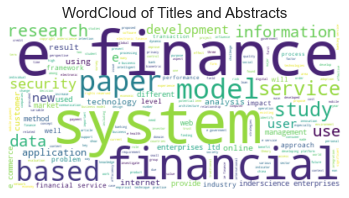

In [97]:
wc = WordCloud(background_color='white', stopwords=STOPWORDS).generate(titles_and_abstracts)
plt.imshow(wc, interpolation='bilinear')
plt.axis(False)
plt.title('WordCloud of Titles and Abstracts', fontdict={'fontsize': 15, 'fontweight': 20})
plt.show()